In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import cv2
import os

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
dir = '/content/drive/MyDrive/Panasonic/'
os.chdir(dir)

Mounted at /content/drive


In [ ]:
img_dir = 'Images/'
filenames = []
labels = []

min_files = min(len(os.listdir(img_dir + '0')), len(os.listdir(img_dir + '1')))
for label in ['0', '1']:
    for file in os.listdir(img_dir + label)[:min_files]:
        filenames.append(img_dir + label + '/' + file)
        labels.append(int(label))

samples = list(zip(filenames, labels))
random.shuffle(samples)

In [ ]:
train_test_split = int(len(samples) * .8)
train_samples = samples[:train_test_split]
validation_samples = samples[train_test_split:]

print(sum(list(map(lambda x:x[1], train_samples)))/len(train_samples))
print(sum(list(map(lambda x:x[1], validation_samples)))/len(validation_samples))

0.4858576642335766
0.5565693430656934


In [ ]:
def generator(samples, batch_size=16):
    num_samples = len(samples)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            x_train, y_train = [], []
            for batch_sample in batch_samples:
                img_name = batch_sample[0]
                label = batch_sample[1]
                img =  cv2.imread(img_name)

                x_train.append(img)
                y_train.append(float(label))

            x_train = np.array(x_train)
            y_train = np.array(y_train)

            yield x_train, y_train

In [ ]:
batch_size_train = 16
train_generator = generator(train_samples, batch_size=batch_size_train)
validation_generator = generator(validation_samples, batch_size=int(len(validation_samples)/(train_test_split/batch_size_train)))

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation = "relu" , input_shape = (100,100,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3, 3), activation = "relu" , input_shape = (100,100,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation = "relu"))  
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation ="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32,activation ="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

#model.summary()

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=int(train_test_split // batch_size_train),
    epochs=40,
    validation_data=validation_generator,
    validation_steps=int(train_test_split // batch_size_train))

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


137/137 [==============================] - 28s 200ms/step - loss: 2.3351 - accuracy: 0.5287 - val_loss: 0.8670 - val_accuracy: 0.5712
Epoch 2/40
137/137 [==============================] - 26s 192ms/step - loss: 1.2031 - accuracy: 0.5479 - val_loss: 0.6980 - val_accuracy: 0.6113
Epoch 3/40
137/137 [==============================] - 26s 193ms/step - loss: 1.0005 - accuracy: 0.5433 - val_loss: 0.6427 - val_accuracy: 0.6569
Epoch 4/40
137/137 [==============================] - 26s 192ms/step - loss: 0.8768 - accuracy: 0.5611 - val_loss: 0.5947 - val_accuracy: 0.6807
Epoch 5/40
137/137 [==============================] - 26s 193ms/step - loss: 0.7888 - accuracy: 0.5922 - val_loss: 0.5713 - val_accuracy: 0.7226
Epoch 6/40
137/137 [==============================] - 27s 194ms/step - loss: 0.7363 - accuracy: 0.6168 - val_loss: 0.5690 - val_accuracy: 0.7245
Epoch 7/40
137/137 [==============================] - 26s 192ms/step - loss: 0.7129 - accuracy: 0.6309 - val_loss: 0.5481 - val_accuracy: 0.7

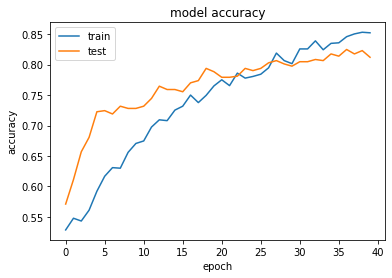

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('logo-recognition')

INFO:tensorflow:Assets written to: logo-recognition/assets


In [ ]:
imgs = []
actual = []
for sample in random.sample(samples, 100):
    imgs.append(cv2.imread(sample[0]))
    actual.append(sample[1])

preds = model.predict(np.array(imgs))
for i in range(len(actual)):
    print(preds[i], actual[i])

[0.5699755] 1
[0.94723356] 1
[0.14840329] 1
[0.6668909] 1
[0.99053645] 1
[0.9382497] 1
[0.5653735] 0
[0.8041738] 1
[0.76527226] 1
[0.03439316] 0
[0.03862464] 0
[0.91645056] 1
[0.9965402] 1
[0.8723562] 1
[0.0255183] 0
[0.99002063] 1
[0.31567374] 0
[0.88465226] 1
[0.5817989] 1
[0.11512962] 0
[0.01146686] 0
[0.9533053] 1
[0.07250041] 0
[0.96284807] 1
[0.8599402] 1
[0.99981225] 1
[0.5655542] 1
[0.9992899] 1
[0.9713901] 1
[0.04351392] 0
[0.84529704] 1
[0.80358064] 0
[0.9654447] 1
[0.9976847] 1
[0.01557744] 0
[0.9916833] 1
[0.87602806] 1
[0.09617803] 0
[0.1586141] 0
[0.40218884] 0
[0.12843642] 0
[0.07282838] 0
[0.99504304] 1
[0.4837828] 1
[0.48923016] 0
[0.2516547] 0
[0.48923016] 1
[0.99943674] 1
[0.06432593] 0
[0.49414876] 1
[0.8808242] 1
[0.04612818] 0
[0.7402654] 1
[0.14169547] 0
[0.88980067] 1
[0.2069819] 1
[0.9892458] 1
[0.9999665] 1
[0.01955619] 0
[0.9895883] 1
[0.36368448] 0
[0.51730305] 1
[0.93240076] 1
[0.66897804] 1
[0.8599402] 1
[0.0389418] 0
[0.8611117] 1
[0.9496556] 1
[0.0540167

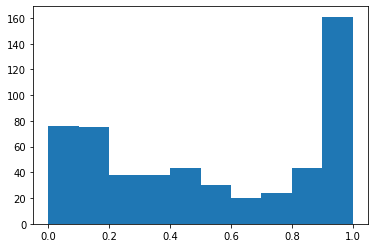

In [ ]:
img_data = []
for valid in validation_samples:
    img_data.append(cv2.imread(valid[0]))

preds = model.predict(np.array(img_data))
plt.hist(preds)
plt.show()